# Name : Deepak Dwivedi
# ID: 11920001
## Question 5

In [82]:
import pandas as pd
import itertools
import os 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None,"display.max_rows", None)
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [86]:
import time
import math
import numpy as np

N = 10000


def mexhat_py(t, sigma=1):
    """Computes Mexican hat shape, see
    http://en.wikipedia.org/wiki/Mexican_hat_wavelet for
    equation (13 Dec 2011)"""
    c = 2. / math.sqrt(3 * sigma) * math.pi ** 0.25
    return c * (1 - t ** 2 / sigma ** 2) * \
        math.exp(-t ** 2 / (2 * sigma ** 2))


def mexhat_np(t, sigma=1):
    """Computes Mexican hat shape using numpy, see
    http://en.wikipedia.org/wiki/Mexican_hat_wavelet for
    equation (13 Dec 2011)"""
    c = 2. / math.sqrt(3 * sigma) * math.pi ** 0.25
    return c * (1 - t ** 2 / sigma ** 2) * \
        np.exp(-t ** 2 / (2 * sigma ** 2))


def test_is_really_the_same():
    """Checking whether mexhat_np and mexhat_py produce
    the same results."""
    xs1, ys1 = loop1()
    xs2, ys2 = loop2()
    deviation = math.sqrt(sum((ys1 - ys2) ** 2))
    print("error:", deviation)
    assert deviation < 4e-15


def loop1():
    """Compute arrays xs and ys with mexican hat function
    in ys(xs), returns tuple (xs,ys)"""
    xs = np.linspace(-10, 10, N)
    ys = []
    for x in xs:
        ys.append(mexhat_py(x))
    return xs, ys

xs,ys=loop1()

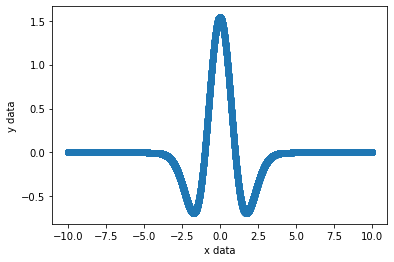

In [87]:
plt.scatter(xs,ys)
plt.xlabel("x data")
plt.ylabel("y data")
plt.show()

In [89]:
xy_dataset=pd.DataFrame(zip(xs,ys),columns=["x","y"])


# creating optimizer

In [115]:
def linear_optimizer(xy_dataset,max_value=5, min_value=-5,threeshold=10):
    for i  in np.arange(min_value+.01,max_value,.05):
        df_f=xy_dataset[(xy_dataset["x"]>=min_value) & (xy_dataset["x"]<=max_value)]
        x=np.asarray(df_f.loc[:,"x"])
        y=np.asarray(df_f.loc[:,"y"])
        x_train=x[x >-i]
        y_train=y[x >-i]
        model = LinearRegression().fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))
        y_pred=model.predict(x_train.reshape(-1, 1))
        d=pd.DataFrame(zip(ys,np.array(y_pred).reshape(-1, )),columns=["Actual Y","Predicted Y"])
        d['diff']=d["Actual Y"]-d["Predicted Y"]
    #print(d['diff'].head())
        left=d[d['diff'] >=0].reset_index().drop(columns=['index'])
        right=d[d['diff'] < 0].reset_index().drop(columns=['index'])
        rmse_left=np.sqrt((np.sum((left['diff'])**2))/left.shape[0])
        rmse_right=np.sqrt((np.sum((right['diff'])**2))/right.shape[0])
        total_RMSE=left.shape[0]*rmse_left+rmse_right*right.shape[0]
        if total_RMSE <= threeshold:
            print("optimum seperation value",i)
            print("RMSE value",total_RMSE)
            break;
        
        elif i==np.sum([max_value,-.05]):
            print("did not meet threeshold value")


In [116]:
linear_optimizer(xy_dataset)



optimum seperation value -4.490000000000002
RMSE value 0.15025972967769238


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_ins

# prediction on x sample

In [117]:
y_pred=model.predict(x_train.reshape(-1, 1))